# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data
mars_table = soup.find('table')
mars_df=pd.read_html(str(mars_table))[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
table = soup.find('table', class_='table')

In [10]:
# Create an empty list for storing the headers
mars_weather_headers = []

# Loop through the scraped data to create a list of headers
mars_weather_table = table.find_all('th')

for header_element in mars_weather_table:
    title = header_element.text
    mars_weather_headers.append(title)

In [11]:
# Create an empty DataFrame with the desired column names
mars_weather_df = pd.DataFrame(columns=mars_weather_headers)

# Loop through the table rows and extract the data
for row in table.find_all('tr', class_='data-row'):
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]

    # Append the row_data to the DataFrame
    mars_weather_df.loc[len(mars_weather_df)] = row_data

In [12]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
mars_weather_df.info

<bound method DataFrame.info of         id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]>

In [14]:
# Change data types for data analysis
data_type_mapping = {
    'id': int,
    'terrestrial_date': 'datetime64',
    'sol': int,
    'ls': int,
    'month': int,
    'min_temp': float,
    'pressure': float
}

# Apply data type conversions
for column, dtype in data_type_mapping.items():
    mars_weather_df[column] = mars_weather_df[column].astype(dtype)

In [15]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mars_month = len(mars_weather_df['month'].unique())
print(f'How many months exist on Mars? {mars_month}')

How many months exist on Mars? 12


In [17]:
# 2. How many Martian days' worth of data are there?
martian_days = len(mars_weather_df['sol'].unique())
print(f'How many Martian daysworth of data are there? {martian_days}')

How many Martian daysworth of data are there? 1867


In [18]:
# 3. What is the average low temperature by month?# Calculate average weather by month
mars_month_temp = mars_weather_df[['month','min_temp']].groupby(by='month').mean()
mars_month_temp['min_temp'] = mars_month_temp['min_temp'].round(decimals = 2)
mars_month_temp


,min_temp
month,
1,-77.16
2,-79.93
3,-83.31
4,-82.75
5,-79.31
6,-75.30
7,-72.28
8,-68.38
9,-69.17


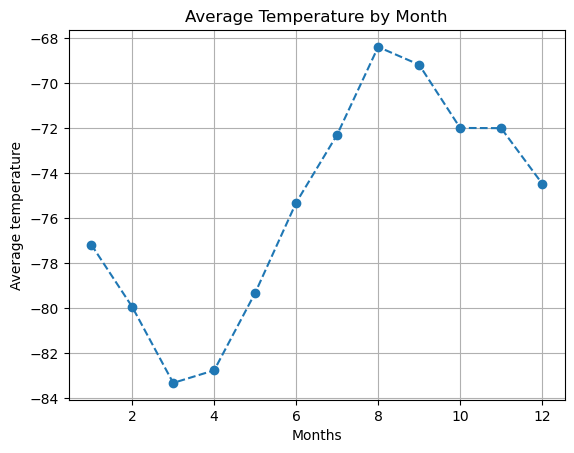

In [19]:
# Plot the average temperature by month
mars_month_temp = mars_month_temp.reset_index()
plt.plot(mars_month_temp['month'], mars_month_temp['min_temp'], marker='o', linestyle='--')
plt.xlabel('Months')
plt.ylabel('Average temperature')
plt.title('Average Temperature by Month')
plt.grid(True)
plt.show()


In [24]:
# Identify the coldest and hottest months in Curiosity's location
mars_month_temp = mars_month_temp.sort_values(by='min_temp')

hottest_month = None
coldest_month = None
hottest_temp = None
coldest_temp = None

for index, row in mars_month_temp.iterrows():
    month = row['month']
    temp = row['min_temp']
    
    if hottest_temp is None or temp > hottest_temp:
        hottest_month = month
        hottest_temp = temp
    
    if coldest_temp is None or temp < coldest_temp:
        coldest_month = month
        coldest_temp = temp

print(f"The hottest month is {hottest_month} with a minimum temperature of {hottest_temp}°.")
print(f"The coldest month is {coldest_month} with a minimum temperature of {coldest_temp}°.")


The hottest month is 8.0 with a minimum temperature of -68.38°.
The coldest month is 3.0 with a minimum temperature of -83.31°.


In [22]:
# 4. Average pressure by Martian month
avg_pressure_martian = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure_martian =avg_pressure_martian.to_frame()
avg_pressure_martian =avg_pressure_martian.reset_index()
avg_pressure_martian =avg_pressure_martian.rename(columns={'pressure':'Average Pressure'})
avg_pressure_martian 

,month,Average Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


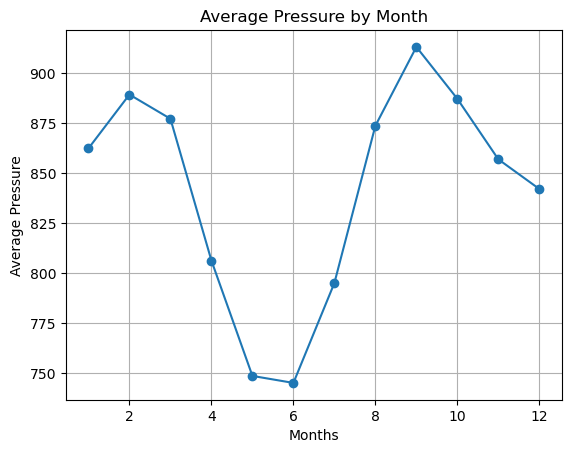

In [23]:
# Plot the average pressure by month
plt.plot(avg_pressure_martian['month'], avg_pressure_martian['Average Pressure'], marker='o', linestyle='-')
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.grid(True)
plt.show()


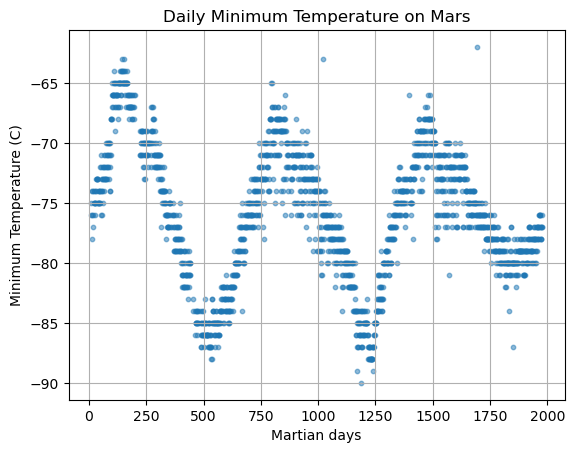

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.scatter(mars_weather_df['sol'], mars_weather_df['min_temp'], s=10, alpha=.5)
plt.xlabel('Martian days')
plt.ylabel('Minimum Temperature (C)') 
plt.title('Daily Minimum Temperature on Mars')
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather', encoding='utf8', index=False)

In [26]:
browser.quit()